# Lab4

## import libs and connect to database

In [147]:
import pandas
import configparser
import psycopg2

In [148]:
config = configparser.ConfigParser()
config.read('config.ini')

host = config['myaws']['host']
db = config['myaws']['db']
user = config['myaws']['user']
pwd = config['myaws']['pwd']

In [149]:
conn = psycopg2.connect(
                        host = host,
                        user = user,
                        password = pwd,
                        database = db
                        )

In [150]:
cur = conn.cursor()

## q1

In [151]:
sql_q1 = """
            select * from gp17.student
            """

In [152]:
df= pandas.read_sql_query(sql_q1,conn)
df[:]

,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,IA
3,s4@jmu.edu,s4,IA
4,s5@jmu.edu,s5,IA
5,s6@jmu.edu,s6,IA
6,s7@jmu.edu,s7,IA
7,s8@jmu.edu,s8,IA
8,s9@jmu.edu,s9,IA
9,s10@jmu.edu,s10,IA


## q2

In [153]:
sql_q2 = """
        select gp17.professor.p_name,
        gp17.course.c_name
        from gp17.professor
        inner join gp17.course
        on gp17.professor.p_email = gp17.course.p_email
        """

In [154]:
df= pandas.read_sql_query(sql_q2,conn)
df[:]

,p_name,c_name
0,Noel Hendrickson,Counterfactual Reasoning
1,Stephen Marrin,INTELLIGENCE ANALYSIS CAPSTONE PROJECT PREPARA...
2,Kathleen Moore,Technology Applications in a Networked World
3,new_p,new_c_name
4,new_p,data mining
5,new_p,data mining


## q3

In [155]:
sql_q3 = """
        select c_number,
        count(c_number) as enrolled
        from gp17.enroll_list
        group by c_number
        order by enrolled desc
        """

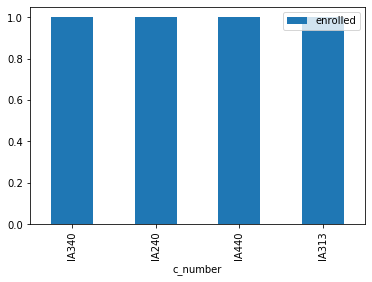

In [156]:
df= pandas.read_sql_query(sql_q3,conn)
df.plot.bar(y = 'enrolled', x = 'c_number')

## q4

In [157]:
sql_q4 = """
        select gp17.professor.p_name,
        count(gp17.course.c_name) as teaching_number
        from gp17.professor
        inner join gp17.course
        on gp17.professor.p_email = gp17.course.p_email
        group by professor.p_name
        order by teaching_number desc
        """

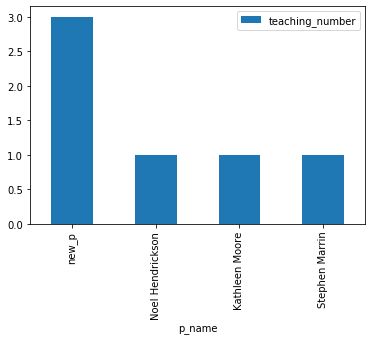

In [158]:
df= pandas.read_sql_query(sql_q4,conn)
df.plot.bar(y = 'teaching_number', x = 'p_name')

## q5

In [159]:
sql_q5_professor = """
                   insert into gp17.professor(p_email, p_name, office)
                   values('()','()','()')
                   """.format('new_p@jmu.edu','new_p','new_office')

In [160]:
cur.execute(sql_q5_professor)

In [161]:
conn.commit()

In [162]:
df = pandas.read_sql_query("select* from gp17.professor",conn)
df[:]

,p_email,p_name,office
0,hendrinx@jmu.edu,Noel Hendrickson,N/A
1,marrinsp@jmu.edu,Stephen Marrin,Engeo2104
2,moore8ka@jmu.edu,Kathleen Moore,ISATCS116
3,new_p@jmu.edu,new_p,new_office
4,(),(),()


In [163]:
sql_q5_course = """
                   insert into gp17.course(c_number,c_name,room,p_email)
                   values('()','()','()','()')
                   """.format('ia_new','new_c_name','online','new_p@jmu.edu')

In [164]:
cur.execute(sql_q5_course)

In [165]:
conn.commit()

In [166]:
df = pandas.read_sql_query('select * from gp17.course',conn)
df[:]

,c_number,c_name,room,p_email
0,IA313,Counterfactual Reasoning,Online,hendrinx@jmu.edu
1,IA440,INTELLIGENCE ANALYSIS CAPSTONE PROJECT PREPARA...,ENGEO 1301,marrinsp@jmu.edu
2,IA240,Technology Applications in a Networked World,Online,moore8ka@jmu.edu
3,ia_new,new_c_name,online,new_p@jmu.edu
4,IA340,data mining,online,new_p@jmu.edu
5,IA340,data mining,online,new_p@jmu.edu
6,(),(),(),()


## q6

In [167]:
sql_q6_course = """
            update gp17.course
            set p_email = '()'
            where p_email = '()'
            """.format('new_p@jmu.edu','weixx@jmu.edu')

In [168]:
cur.execute(sql_q6_course)

In [169]:
#cur.execute('ROLLBACK')

In [170]:
conn.commit()

In [171]:
df = pandas.read_sql_query('select * from gp17.course',conn)
df[:]

,c_number,c_name,room,p_email
0,IA313,Counterfactual Reasoning,Online,hendrinx@jmu.edu
1,IA440,INTELLIGENCE ANALYSIS CAPSTONE PROJECT PREPARA...,ENGEO 1301,marrinsp@jmu.edu
2,IA240,Technology Applications in a Networked World,Online,moore8ka@jmu.edu
3,ia_new,new_c_name,online,new_p@jmu.edu
4,IA340,data mining,online,new_p@jmu.edu
5,IA340,data mining,online,new_p@jmu.edu
6,(),(),(),()


In [172]:
sql_q6_professor = """
                delete from gp17.professor
                where p_email = '{}'
                """.format('weixx@jmu.edu')

In [173]:
cur.execute(sql_q6_professor)

In [174]:
#cur.execute('ROLLBACK')

In [175]:
df = pandas.read_sql_query('select * from gp17.professor',conn)
df[:]

,p_email,p_name,office
0,hendrinx@jmu.edu,Noel Hendrickson,N/A
1,marrinsp@jmu.edu,Stephen Marrin,Engeo2104
2,moore8ka@jmu.edu,Kathleen Moore,ISATCS116
3,new_p@jmu.edu,new_p,new_office
4,(),(),()


## close connection

In [176]:
cur.close()
conn.close()